# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; MLP 
# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&emsp;★ Assignment Unit 1★
### Submitted by:- &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Submitted to:-
<br/>
<b>HRITHIK JOHRI , UID -18BCS6145</b>&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>Prof.Shifali Sharma</b>                    
<br/>
<b>AIML-2</b>
<br/>


# Task

In the dataset, there is a file named 'co2_emissions_tonnes_per_person.csv' which contains the per capita CO2 emissions of various countries across many years. This is your target variable. Your task is to build a regression model to predict per capita CO2 emissions using all the other variables as predictors. The objective is to understand how much each predictor constitutes to the global  CO2 emissions. 
<br/>
    <br/>
Note that all the files contain information across a number of years. Your task is to build a model only for the year 2014 (that's the year most of the data is available). Also, note that each country will be one data point. 

## Importing important libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv files and storing them in dataframes
df1 = pd.read_csv("cars_trucks_and_buses_per_1000_persons.csv")
df2 = pd.read_csv("co2_emissions_tonnes_per_person.csv")
df3 = pd.read_csv("coal_consumption_per_cap.csv")
df4 = pd.read_csv("electricity_generation_per_person.csv")
df5 = pd.read_csv("electricity_use_per_person.csv")
df6 = pd.read_csv("forest_coverage_percent.csv")
df7 = pd.read_csv("hydro_power_generation_per_person.csv")
df8 = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
df9 = pd.read_csv("industry_percent_of_gdp.csv")
df10 = pd.read_csv("natural_gas_production_per_person.csv")
df11 = pd.read_csv("oil_consumption_per_cap.csv")
df12 = pd.read_csv("oil_production_per_person.csv")
df13 = pd.read_csv("yearly_co2_emissions_1000_tonnes.csv")

In [3]:
#Inspecting df1
df1

,geo,2002,2003,2004,2005,2006,2007
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,22.8
1,Albania,73.0,NaN,85.0,87.5,97.3,102.0
2,Algeria,NaN,88.0,89.0,91.0,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,39.6
4,Argentina,NaN,NaN,NaN,NaN,NaN,314.0
...,...,...,...,...,...,...,...
152,Venezuela,NaN,NaN,NaN,NaN,NaN,147.0
153,Vietnam,8.0,NaN,NaN,NaN,NaN,13.5
154,Yemen,NaN,NaN,NaN,NaN,NaN,34.8
155,Zambia,NaN,NaN,NaN,NaN,NaN,17.7


In [4]:
#Inspecting df2
df2

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.920,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.1600,6.2200,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030
188,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1600,1.2100,1.2200,1.360,1.470,1.610,1.700,1.570,1.610,1.800
189,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9740,1.0100,0.9640,0.999,1.070,0.993,0.811,0.749,0.997,0.865
190,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1900,0.1850,0.1520,0.166,0.186,0.194,0.206,0.249,0.261,0.288


In [5]:
#Inspection df7
df7

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.09770,0.13500,0.15000,0.14700,0.14800,0.07560,0.10300,0.14000,0.20300,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00016,0.00071,0.00067,0.00145,0.00056,0.00057,0.00071,0.00075,0.00042,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00660,0.00692,0.00943,0.01160,0.01350,0.01230,0.01490,0.01430,0.01590,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08190,0.07650,0.06830,0.07560,0.08360,0.06630,0.06590,0.07270,0.07150,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04660,0.05570,0.05610,0.04970,0.05110,0.05180,0.05020,0.05630,0.07110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Uzbekistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02100,0.02570,0.03010,0.02860,0.03010,0.02080,0.03640,0.02960,0.03400,NaN
114,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.20300,0.20200,0.23000,0.24900,0.25900,0.25900,0.26600,0.25900,0.22800,NaN
115,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01940,0.02010,0.01860,0.01750,0.02090,0.02330,0.02600,0.02970,0.02700,NaN
116,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06510,0.06490,0.06500,0.06660,0.07200,0.06990,0.06710,0.07020,0.07410,NaN


### filterr is a functution defined to filter geo and 2014 data from the whole data

In [6]:
#Creating function
def filterr(df,name):
    df = df[['geo','2014']]
    df = df.rename(columns={'2014':name})
    return df

In [7]:
#Applying filter functions to those dataframes which includes 2014 dataframes
df2 = filterr(df2,'co2_emissions_tonnes_per_person')
df3 = filterr(df3,'coal_consumption_per_cap')
df4 = filterr(df4,'electricity_generation_per_person')
df5 = filterr(df5,'electricity_use_per_person')
df6 = filterr(df6,'forest_coverage_percent')
df8 = filterr(df8,'income_per_person_gdppercapita_ppp_inflation_adjusted')
df9 = filterr(df9,'industry_percent_of_gdp')
df10 = filterr(df10,'natural_gas_production_per_person')
df11 = filterr(df11,'oil_consumption_per_cap')
df12 = filterr(df12,'oil_production_per_person')
df13 = filterr(df13,'yearly_co2_emissions_1000_tonnes')

In [8]:
#Inspecting df3
df3

,geo,coal_consumption_per_cap
0,Algeria,0.00458
1,Argentina,0.03460
2,Australia,1.82000
3,Austria,0.34700
4,Azerbaijan,0.00017
...,...,...
60,United Kingdom,0.45700
61,United States,1.43000
62,Uzbekistan,0.04000
63,Venezuela,0.00641


<b>Now, we have to merge all the dataframes

In [9]:
#Merging dataframes into one co2df dataframe
co2df = pd.merge(df2,df3)
co2df = pd.merge(co2df,df4)
co2df = pd.merge(co2df,df5)
co2df = pd.merge(co2df,df6)
co2df = pd.merge(co2df,df8)
co2df = pd.merge(co2df,df9)
co2df = pd.merge(co2df,df10)
co2df = pd.merge(co2df,df11)
co2df = pd.merge(co2df,df12)
co2df = pd.merge(co2df,df13)

In [10]:
#Inspecting co2df dataframe
co2df.head()

,geo,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,forest_coverage_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,natural_gas_production_per_person,oil_consumption_per_cap,oil_production_per_person,yearly_co2_emissions_1000_tonnes
0,Algeria,3.72,0.00458,1640,1360.0,0.82,13500,42.3,1.920,0.452,1.760,145000.0
1,Argentina,4.75,0.03460,3290,3050.0,10.00,18800,24.3,0.742,0.729,0.695,204000.0
2,Australia,15.40,1.82000,10500,10100.0,16.20,43400,25.4,2.440,2.050,0.813,361000.0
3,Azerbaijan,3.94,0.00017,2600,2200.0,13.50,16700,53.6,1.660,0.468,4.430,37500.0
4,Brazil,2.59,0.08580,2890,2600.0,59.20,15400,20.5,0.100,0.737,0.600,530000.0


In [11]:
#Checking shape
co2df.shape

(33, 12)

In [12]:
#Checking null values
co2df.isnull().sum()

geo                                                      0
co2_emissions_tonnes_per_person                          0
coal_consumption_per_cap                                 0
electricity_generation_per_person                        0
electricity_use_per_person                               0
forest_coverage_percent                                  0
income_per_person_gdppercapita_ppp_inflation_adjusted    0
industry_percent_of_gdp                                  0
natural_gas_production_per_person                        0
oil_consumption_per_cap                                  0
oil_production_per_person                                0
yearly_co2_emissions_1000_tonnes                         0
dtype: int64

In [13]:
#Creating a list of numerical Variables
numeric_variables = list(co2df.columns[co2df.dtypes != 'object'])

# Outlier Detection :-

<b>Defining a distplot function (dist_plot) which will take list of numerical variables as well as singular numerical variables and plot them and will also show the normal curve and best curve fit to the distribution.</b>

In [14]:
#Importing stats from scipy
from scipy import stats  
#Defining function for plotting numerical variables
def dist_plot(variable):
    plt.figure(figsize = (40,20))
    if(type(variable) is list):
        for i in variable:
            plt.subplot(4,3,variable.index(i)+1)
            sns.distplot(co2df[i])
            xt = plt.xticks()[0]  
            xmin, xmax = min(xt), max(xt)  
            lnspc = np.linspace(xmin, xmax, len(co2df[i]))
            m, s = stats.norm.fit(co2df[i])
            pdf_g = stats.norm.pdf(lnspc, m, s)
            plt.plot(lnspc, pdf_g, label="Norm")
    elif(type(variable) is str):
        sns.distplot(co2df[variable])
        plt.title(variable)
        xt = plt.xticks()[0]  
        xmin, xmax = min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(co2df[variable]))
        m, s = stats.norm.fit(co2df[variable])
        pdf_g = stats.norm.pdf(lnspc, m, s)
        plt.plot(lnspc, pdf_g, label="Norm")

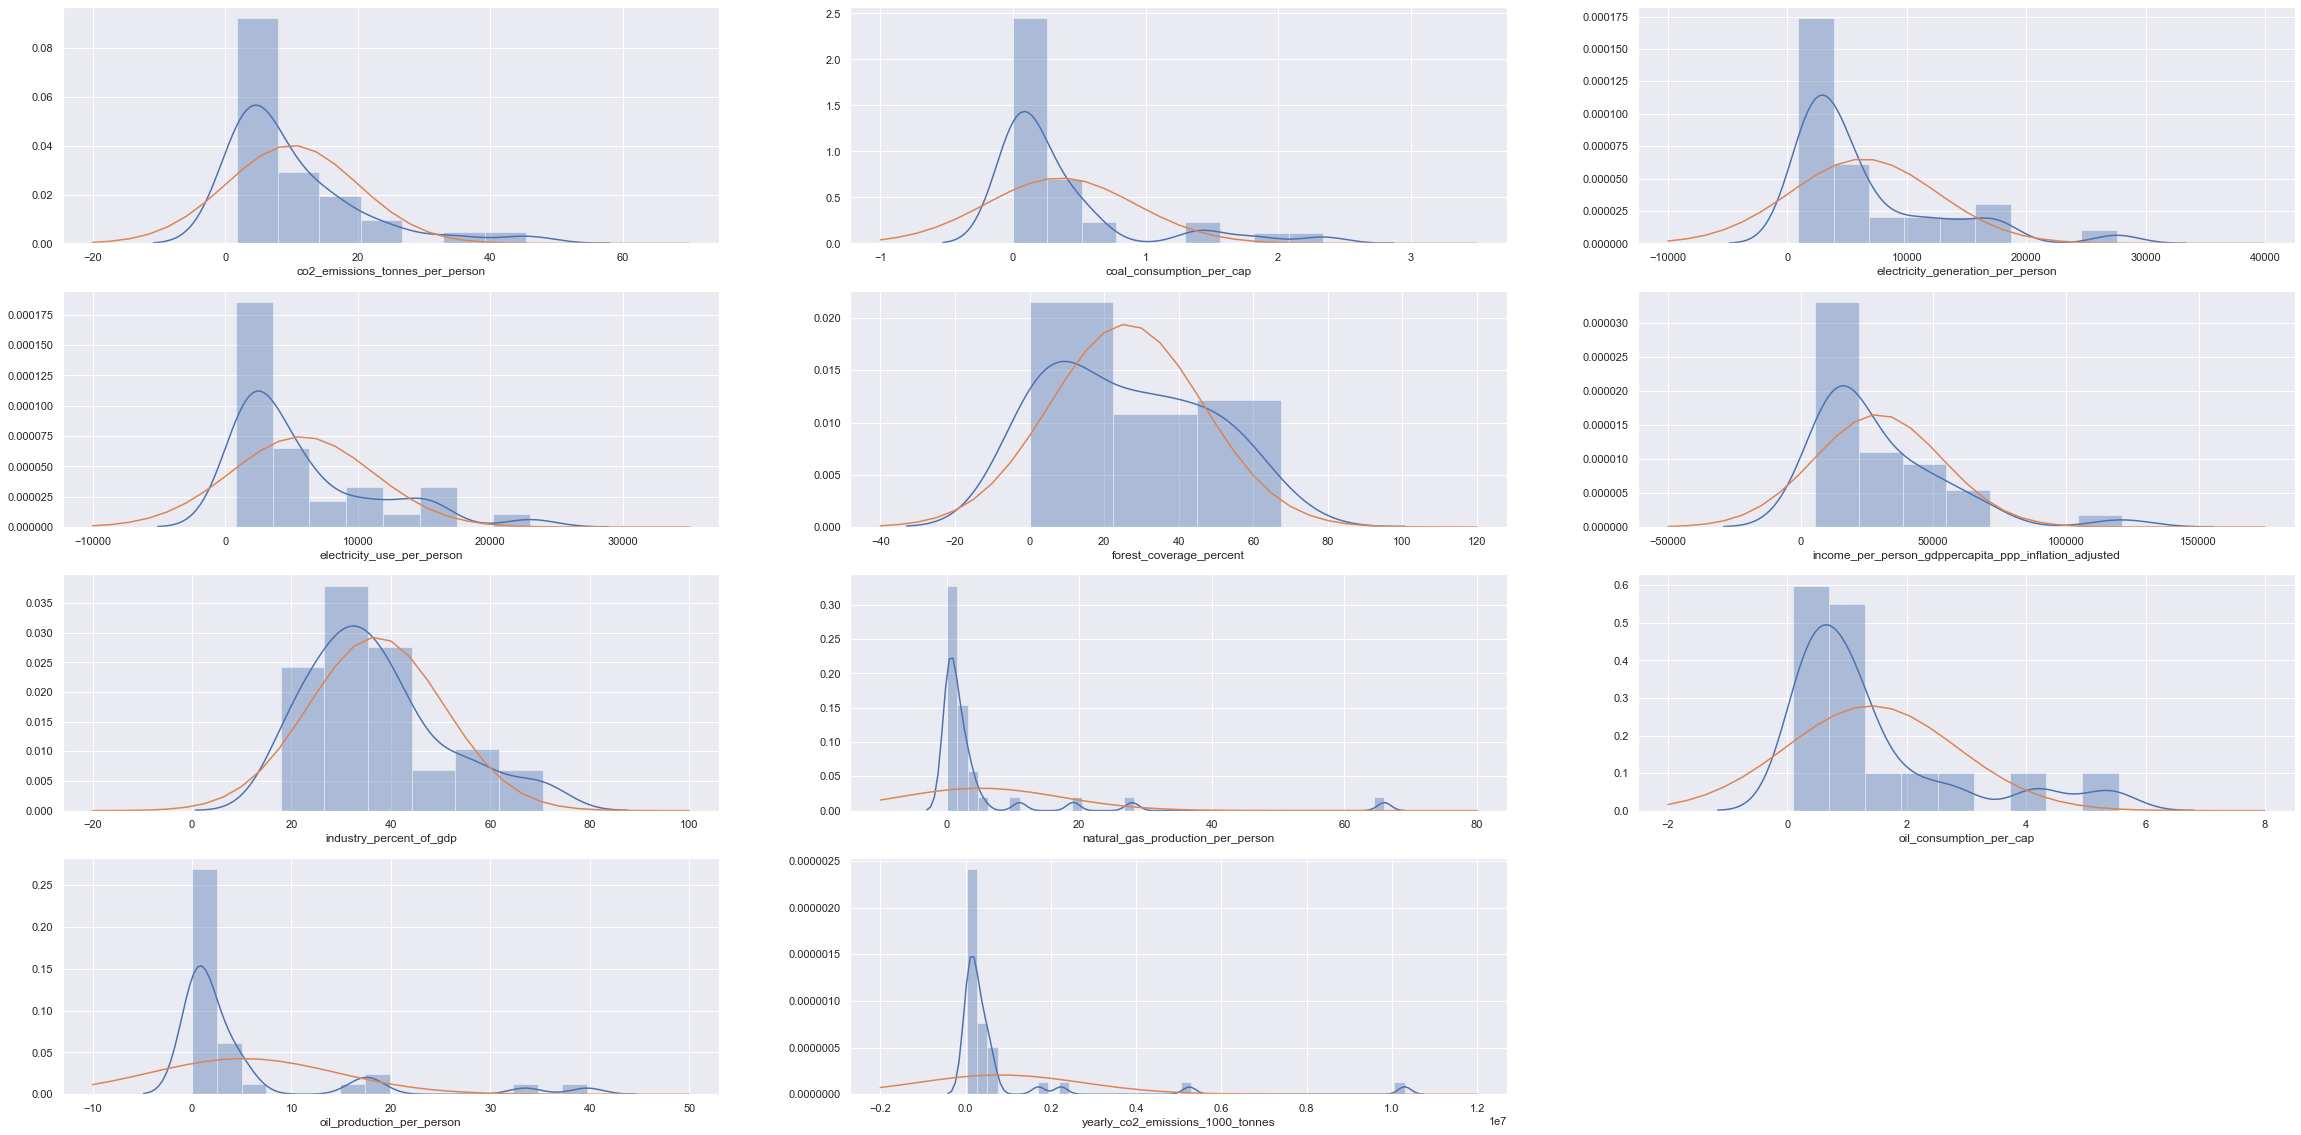

In [15]:
#Plotting for numerical variables
dist_plot(numeric_variables)

<b>From the above plot we can see that there are some outliers present.

In [16]:
#Checking co2df
co2df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 12 columns):
geo                                                      33 non-null object
co2_emissions_tonnes_per_person                          33 non-null float64
coal_consumption_per_cap                                 33 non-null float64
electricity_generation_per_person                        33 non-null int64
electricity_use_per_person                               33 non-null float64
forest_coverage_percent                                  33 non-null float64
income_per_person_gdppercapita_ppp_inflation_adjusted    33 non-null int64
industry_percent_of_gdp                                  33 non-null float64
natural_gas_production_per_person                        33 non-null float64
oil_consumption_per_cap                                  33 non-null float64
oil_production_per_person                                33 non-null float64
yearly_co2_emissions_1000_tonnes                       

In [17]:
#Checking for correlation
co2df.corr()

,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,forest_coverage_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,natural_gas_production_per_person,oil_consumption_per_cap,oil_production_per_person,yearly_co2_emissions_1000_tonnes
co2_emissions_tonnes_per_person,1.000000,0.072586,0.616939,0.655008,-0.303634,0.819585,0.585031,0.789657,0.758837,0.730895,-0.021843
coal_consumption_per_cap,0.072586,1.000000,0.130728,0.173286,-0.063724,0.042978,-0.321454,-0.169961,-0.037279,-0.186947,0.463521
electricity_generation_per_person,0.616939,0.130728,1.000000,0.995825,-0.164724,0.807916,0.234565,0.470693,0.734216,0.691894,0.006405
electricity_use_per_person,0.655008,0.173286,0.995825,1.000000,-0.182132,0.839071,0.227236,0.488956,0.754879,0.696951,0.023182
forest_coverage_percent,-0.303634,-0.063724,-0.164724,-0.182132,1.000000,-0.330581,-0.387368,-0.174757,-0.365946,-0.392621,0.025110
income_per_person_gdppercapita_ppp_inflation_adjusted,0.819585,0.042978,0.807916,0.839071,-0.330581,1.000000,0.398804,0.712562,0.824429,0.820701,-0.076267
industry_percent_of_gdp,0.585031,-0.321454,0.234565,0.227236,-0.387368,0.398804,1.000000,0.505993,0.541264,0.708196,-0.084172
natural_gas_production_per_person,0.789657,-0.169961,0.470693,0.488956,-0.174757,0.712562,0.505993,1.000000,0.395971,0.576356,-0.120514
oil_consumption_per_cap,0.758837,-0.037279,0.734216,0.754879,-0.365946,0.824429,0.541264,0.395971,1.000000,0.852679,-0.067199
oil_production_per_person,0.730895,-0.186947,0.691894,0.696951,-0.392621,0.820701,0.708196,0.576356,0.852679,1.000000,-0.146682


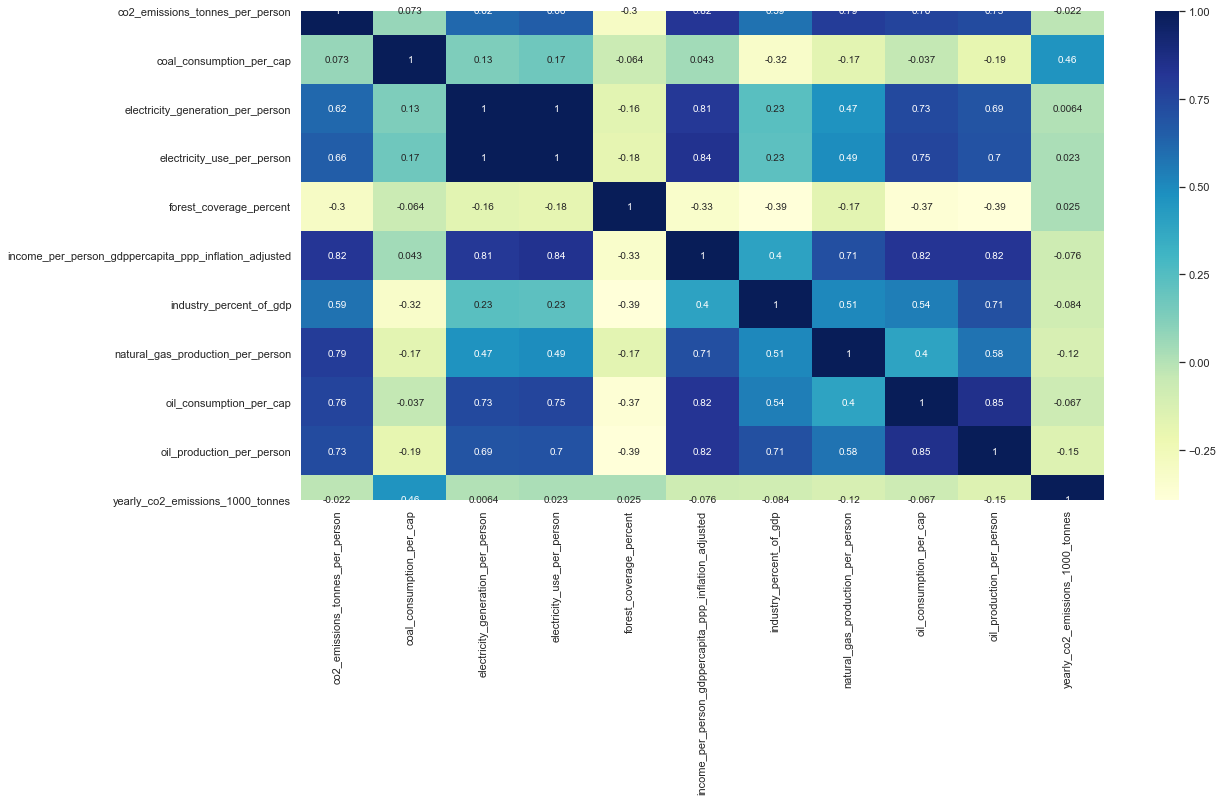

In [18]:
#Plotting Correlation Graph
plt.figure(figsize=(18,9))
sns.heatmap(co2df.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the above plot we can see that <b>forest_coverage_percent</b> is negatively correlated so we will drop it.

In [19]:
#Dropping forest_coverage_percent
co2df.drop('forest_coverage_percent',axis=1,inplace=True)

In [20]:
#Creating a list of numerical Variables
numeric_variables = list(co2df.columns[co2df.dtypes != 'object'])

In [21]:
#Inspecting Dataset
co2df.head()

,geo,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,natural_gas_production_per_person,oil_consumption_per_cap,oil_production_per_person,yearly_co2_emissions_1000_tonnes
0,Algeria,3.72,0.00458,1640,1360.0,13500,42.3,1.920,0.452,1.760,145000.0
1,Argentina,4.75,0.03460,3290,3050.0,18800,24.3,0.742,0.729,0.695,204000.0
2,Australia,15.40,1.82000,10500,10100.0,43400,25.4,2.440,2.050,0.813,361000.0
3,Azerbaijan,3.94,0.00017,2600,2200.0,16700,53.6,1.660,0.468,4.430,37500.0
4,Brazil,2.59,0.08580,2890,2600.0,15400,20.5,0.100,0.737,0.600,530000.0


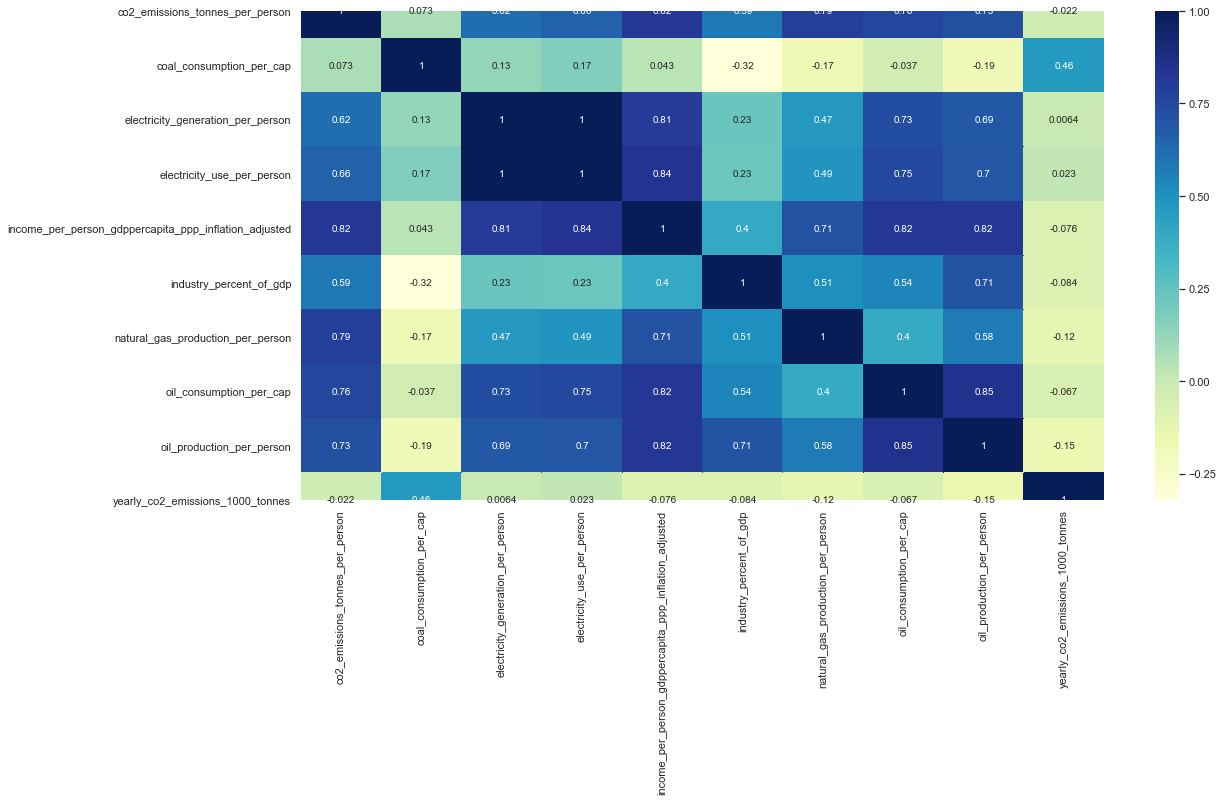

In [22]:
#Plotting Correlation Graph
plt.figure(figsize=(18,9))
sns.heatmap(co2df.corr(), cmap="YlGnBu", annot = True)
plt.show()

<b>Column Industry_percent_of_gdp correlation is less than 0.5 with most of the features. So, we drop the column.

In [23]:
#Dropping industry_percent_of_gdp
co2df.drop('industry_percent_of_gdp',axis=1,inplace=True)

In [24]:
#Inspecting Dataset
co2df.head()

,geo,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,natural_gas_production_per_person,oil_consumption_per_cap,oil_production_per_person,yearly_co2_emissions_1000_tonnes
0,Algeria,3.72,0.00458,1640,1360.0,13500,1.920,0.452,1.760,145000.0
1,Argentina,4.75,0.03460,3290,3050.0,18800,0.742,0.729,0.695,204000.0
2,Australia,15.40,1.82000,10500,10100.0,43400,2.440,2.050,0.813,361000.0
3,Azerbaijan,3.94,0.00017,2600,2200.0,16700,1.660,0.468,4.430,37500.0
4,Brazil,2.59,0.08580,2890,2600.0,15400,0.100,0.737,0.600,530000.0


In [25]:
#Resetting Index
co2df.reset_index(inplace = True)

In [26]:
#Inspect Dataset
co2df.head()

,index,geo,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,natural_gas_production_per_person,oil_consumption_per_cap,oil_production_per_person,yearly_co2_emissions_1000_tonnes
0,0,Algeria,3.72,0.00458,1640,1360.0,13500,1.920,0.452,1.760,145000.0
1,1,Argentina,4.75,0.03460,3290,3050.0,18800,0.742,0.729,0.695,204000.0
2,2,Australia,15.40,1.82000,10500,10100.0,43400,2.440,2.050,0.813,361000.0
3,3,Azerbaijan,3.94,0.00017,2600,2200.0,16700,1.660,0.468,4.430,37500.0
4,4,Brazil,2.59,0.08580,2890,2600.0,15400,0.100,0.737,0.600,530000.0


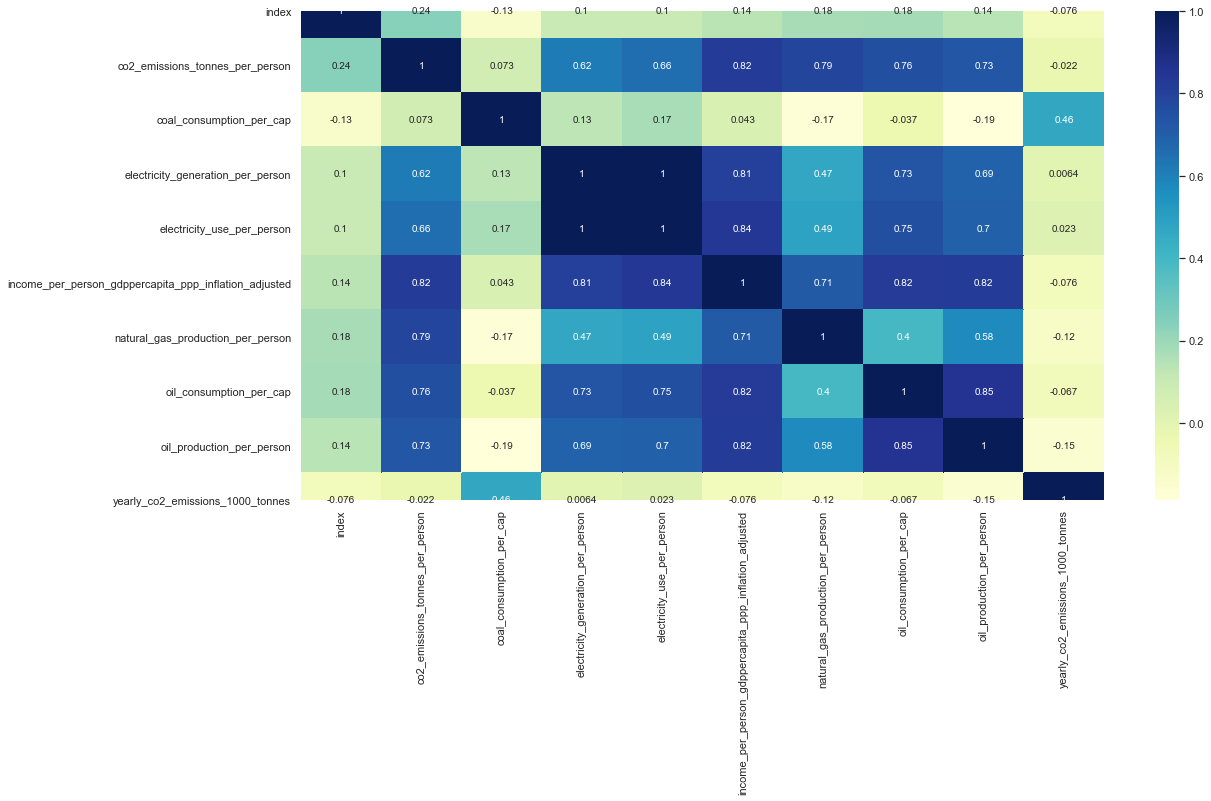

In [27]:
#Checking Correlation
plt.figure(figsize=(18,9))
sns.heatmap(co2df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Outlier Treatment :-

In [28]:
#Applying IQR method 
q1 = co2df.quantile(0.25)
q3 = co2df.quantile(0.75)
IQR = q3 - q1
co2df = co2df[~((co2df < (q1 - 1.5 * IQR)) |(co2df > (q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
#Checking Shape
co2df.shape

(19, 11)

In [30]:
#Checking Unique values
co2df.geo.unique()

array(['Algeria', 'Argentina', 'Azerbaijan', 'Brazil', 'Colombia',
       'Denmark', 'Egypt', 'Indonesia', 'Iran', 'Italy', 'Malaysia',
       'Mexico', 'Peru', 'Romania', 'Thailand', 'United Kingdom',
       'Uzbekistan', 'Venezuela', 'Vietnam'], dtype=object)

## Creating Dummy variables for categorical variable geo

In [31]:
# convert into dummies
geodummy = pd.get_dummies(co2df['geo'], drop_first=True)
geodummy.head()

,Argentina,Azerbaijan,Brazil,Colombia,Denmark,Egypt,Indonesia,Iran,Italy,Malaysia,Mexico,Peru,Romania,Thailand,United Kingdom,Uzbekistan,Venezuela,Vietnam
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#Dropping geo
co2df.drop('geo',axis=1,inplace=True)

In [33]:
#Inspecting Dataset
co2df.head()

,index,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,natural_gas_production_per_person,oil_consumption_per_cap,oil_production_per_person,yearly_co2_emissions_1000_tonnes
0,0,3.72,0.00458,1640,1360.0,13500,1.920,0.452,1.760,145000.0
1,1,4.75,0.03460,3290,3050.0,18800,0.742,0.729,0.695,204000.0
3,3,3.94,0.00017,2600,2200.0,16700,1.660,0.468,4.430,37500.0
4,4,2.59,0.08580,2890,2600.0,15400,0.100,0.737,0.600,530000.0
7,7,1.76,0.11000,1560,1290.0,12700,0.222,0.309,1.090,84100.0


In [34]:
# Dropping extra index variable created because of reset indexing
co2df.drop('index',axis=1,inplace=True)

In [35]:
#Inspecting
co2df.head()

,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,natural_gas_production_per_person,oil_consumption_per_cap,oil_production_per_person,yearly_co2_emissions_1000_tonnes
0,3.72,0.00458,1640,1360.0,13500,1.920,0.452,1.760,145000.0
1,4.75,0.03460,3290,3050.0,18800,0.742,0.729,0.695,204000.0
3,3.94,0.00017,2600,2200.0,16700,1.660,0.468,4.430,37500.0
4,2.59,0.08580,2890,2600.0,15400,0.100,0.737,0.600,530000.0
7,1.76,0.11000,1560,1290.0,12700,0.222,0.309,1.090,84100.0


In [36]:
#Creating dataframe with geodummy and co2df dataframe
co2df = pd.concat([geodummy,co2df], axis=1)

In [37]:
#Inspecting
co2df.head()

,Argentina,Azerbaijan,Brazil,Colombia,Denmark,Egypt,Indonesia,Iran,Italy,Malaysia,...,Vietnam,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,natural_gas_production_per_person,oil_consumption_per_cap,oil_production_per_person,yearly_co2_emissions_1000_tonnes
0,0,0,0,0,0,0,0,0,0,0,...,0,3.72,0.00458,1640,1360.0,13500,1.920,0.452,1.760,145000.0
1,1,0,0,0,0,0,0,0,0,0,...,0,4.75,0.03460,3290,3050.0,18800,0.742,0.729,0.695,204000.0
3,0,1,0,0,0,0,0,0,0,0,...,0,3.94,0.00017,2600,2200.0,16700,1.660,0.468,4.430,37500.0
4,0,0,1,0,0,0,0,0,0,0,...,0,2.59,0.08580,2890,2600.0,15400,0.100,0.737,0.600,530000.0
7,0,0,0,1,0,0,0,0,0,0,...,0,1.76,0.11000,1560,1290.0,12700,0.222,0.309,1.090,84100.0


In [38]:
#Importing scale and traintestsplit library
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [39]:
# scaling the features
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = co2df.columns
co2df = pd.DataFrame(scale(co2df))
co2df.columns = cols
co2df.columns

Index(['Argentina', 'Azerbaijan', 'Brazil', 'Colombia', 'Denmark', 'Egypt',
       'Indonesia', 'Iran', 'Italy', 'Malaysia', 'Mexico', 'Peru', 'Romania',
       'Thailand', 'United Kingdom', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'co2_emissions_tonnes_per_person', 'coal_consumption_per_cap',
       'electricity_generation_per_person', 'electricity_use_per_person',
       'income_per_person_gdppercapita_ppp_inflation_adjusted',
       'natural_gas_production_per_person', 'oil_consumption_per_cap',
       'oil_production_per_person', 'yearly_co2_emissions_1000_tonnes'],
      dtype='object')

In [40]:
target =co2df.pop('co2_emissions_tonnes_per_person')
X = co2df

In [41]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, target,train_size=0.7,test_size = 0.3, random_state=100)

# Model Building and Evaluation

## Ridge and Lasso Regression

In this part we will create model for predicting Carbon Emission by performing ridge and lasso regression.

In [42]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002594,4.894160e-04,0.001196,3.990661e-04,0.0001,{'alpha': 0.0001},-0.296152,-0.159866,-0.572467,-0.331847,...,-0.448564,0.290252,1,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,2.019574e-07
1,0.001994,3.814697e-07,0.000997,2.431402e-07,0.001,{'alpha': 0.001},-0.296172,-0.159867,-0.572476,-0.331845,...,-0.448573,0.290255,2,-0.000023,-0.000023,-0.000019,-0.000020,-0.000018,-0.000020,2.019436e-06
2,0.002194,3.995182e-04,0.000997,1.168008e-07,0.01,{'alpha': 0.01},-0.296371,-0.159873,-0.572564,-0.331815,...,-0.448659,0.290288,3,-0.000227,-0.000227,-0.000192,-0.000198,-0.000175,-0.000204,2.018062e-05
3,0.001996,8.597098e-06,0.000994,6.504241e-06,0.05,{'alpha': 0.05},-0.297248,-0.159898,-0.572956,-0.331688,...,-0.449041,0.290434,4,-0.001131,-0.001132,-0.000961,-0.000989,-0.000874,-0.001017,1.006022e-04
4,0.001998,5.112175e-06,0.000997,6.487439e-06,0.1,{'alpha': 0.1},-0.298333,-0.159920,-0.573445,-0.331533,...,-0.449514,0.290617,5,-0.002254,-0.002259,-0.001918,-0.001974,-0.001743,-0.002030,2.004723e-04


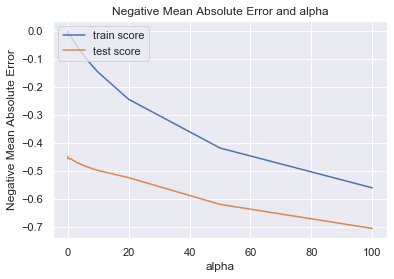

In [44]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In this plot, we can observe that the point at which both becomes static is approx <b>50</b> , so we will set alpha for ridge to be <b>alpha 50</b>

In [45]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.74075481e-34, -5.71981969e-03, -4.26256238e-02, -4.61220858e-02,
        1.19228380e-02, -3.69908960e-02, -4.40043605e-02,  1.04724539e-01,
        2.23521708e-02,  8.36685005e-02, -6.54945739e-04, -6.74075481e-34,
       -6.74075481e-34, -6.74075481e-34, -6.74075481e-34, -2.05999191e-04,
       -6.74075481e-34, -4.06050599e-02,  4.08754058e-02,  8.99967638e-02,
        8.32727282e-02,  5.66381310e-02,  1.09448252e-01,  1.01575507e-01,
        3.33148865e-02,  4.15499872e-02])

# Performing LASSO

In [46]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 7, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 7 folds for each of 28 candidates, totalling 196 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:    0.8s finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.004843,0.000992,0.001139,0.000346,0.0001,{'alpha': 0.0001},-0.986360,-0.386476,-0.495588,-1.498191,...,10,-0.000141,-0.000135,-0.000191,-0.000173,-0.000112,-0.000158,-0.000197,-0.000158,0.000029
1,0.003990,0.000002,0.000997,0.000001,0.001,{'alpha': 0.001},-0.605605,-0.707106,-0.053821,-1.072996,...,5,-0.002012,-0.001927,-0.002221,-0.002223,-0.001895,-0.001753,-0.002226,-0.002037,0.000177
2,0.003277,0.000698,0.001000,0.000007,0.01,{'alpha': 0.01},-0.582347,-0.633128,-0.330445,-0.739707,...,3,-0.019302,-0.020276,-0.022909,-0.022152,-0.019413,-0.016895,-0.021525,-0.020353,0.001894
3,0.002565,0.000493,0.000997,0.000001,0.05,{'alpha': 0.05},-0.469691,-0.604007,-0.436505,-0.677371,...,2,-0.090244,-0.076531,-0.097958,-0.094383,-0.097389,-0.076684,-0.086752,-0.088563,0.008384
4,0.002572,0.000501,0.001274,0.000456,0.1,{'alpha': 0.1},-0.372379,-0.551957,-0.394806,-0.763374,...,1,-0.167590,-0.142851,-0.162398,-0.172851,-0.176362,-0.150332,-0.167615,-0.162857,0.011242


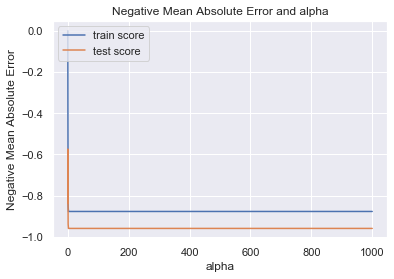

In [48]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In this plot, we can observe that the point at which both becomes static is less than <b>0.001</b> , so we will set alpha for ridge to be <b>alpha 0.00001</b>

In [49]:
alpha =0.00001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
lasso.coef_

array([-0.        ,  0.01342965, -0.19418584, -0.26495686,  0.19503003,
       -0.2081527 , -0.27150261,  0.49017204,  0.12349784,  0.46462305,
       -0.04153119, -0.        , -0.        , -0.        , -0.        ,
       -0.02618092, -0.        , -0.26566613,  0.02358906, -0.00781551,
        0.0028921 ,  0.00209018, -0.08541129,  0.01871912,  0.01939099,
        0.03192341])

In [51]:
#Importing Linear regression Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()

In [52]:
#Creating Linear Model
Linear_model.fit(X_train,y_train)
prediction = Linear_model.predict(X_test)
prediction[:10]

array([ 0.82814926, -0.39222613,  0.20626099, -0.95715603, -0.15423464,
       -0.10696499])

In [53]:
#Importing mean_squared_error and calculation meansquare for linear
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,prediction)**(0.5))

0.3850435772366392


In [54]:
#Importing r2 square
from sklearn.metrics import r2_score

In [55]:
#Checking r2 score for linear
r2_score(y_test,prediction)

0.7410766859817439

In [56]:
#Creating Ridge model for prediction
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
prediction1 = ridge_model.predict(X_test)

In [57]:
#Checking Mean squared error for ridge
print(mean_squared_error(y_test,prediction1)**(0.5))

0.38494746173796296


In [58]:
#Checking r2 score for ridge
r2_score(y_test,prediction1)

0.7412059359617336

In [59]:
#Creating Lasso model for prediction
lasso_model = Lasso(alpha=0.00001)
lasso_model.fit(X_train,y_train)
prediction2 = lasso_model.predict(X_test)

In [60]:
#Checking Mean squared error for Lasso
print(mean_squared_error(y_test,prediction2)**(0.5))

0.7531289239713426


In [61]:
#Checking r2 score for Lasso
r2_score(y_test,prediction2)

0.009418884967708263

<b> We can see that Lasso and ridge reached linear regression model by using alpha 0.00001 that means using Linear Regression which is Fine.</b>